# Task 1


In [3]:
# imports

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns


## Subtask A - Data loading

In [4]:
# we load the comma separated values using pandas
data_frame = pd.read_csv("data/data_PGR107.csv")

# we display the data to get an overview of what we are working with
data_frame

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


Based on the data above, it seems like the data provided is a list of reservations at a restaurant. Our reasoning for this is that they classify time as "Dinner" or "Lunch", as well as have column headers such as `total_bill` and `tip` which are very restaurant-like.

We believe each column can be described as the following:
- `total_bill`: The total amount of money on the reservation's bill
- `tip`: The extra money paid on top of the bill
- `smoker`: Whether the customer(s) were smoking cigarettes (to tell the data recipient that extra fees needed to be paid?)
- `day`: The weekday the reservation was made
- `time`: Whether the reservation was placed to be under dinnertime or lunchtime.
- `size`: How many people the reservation was made for

This data can be visualized in several ways. We will be displaying a variety of charts that can utilize these data points.

## Subtask B - Data exploration & visualization

We will first be exploring the magnitudes of orders based on certain properties like which day the reservation was on or whether the customers were smoking.

In [5]:
# first we will get the unique values of each column
uniques = pd.Series({column: data_frame[column].unique() for column in data_frame})

unique_days, unique_smoker, unique_time = uniques["day"], uniques["smoker"], uniques["time"]

uniques


total_bill    [16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.7...
tip           [1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2.0, 3.12,...
smoker                                                [No, Yes]
day                                       [Sun, Sat, Thur, Fri]
time                                            [Dinner, Lunch]
size                                         [2, 3, 4, 1, 6, 5]
dtype: object

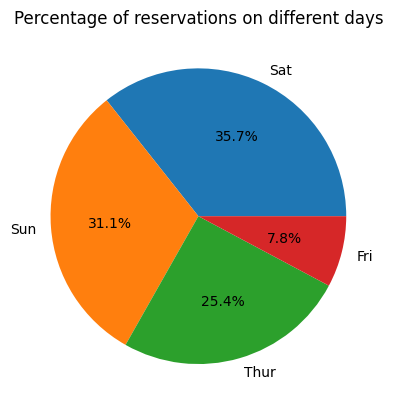

In [6]:
# we can the plot the number of reservations for each day
number_of_reservations_per_day = data_frame.day.value_counts()

# we set up a figure and axis for the plot
fig, ax = plt.subplots()

# we create and plot the pie chart
ax.set_title("Percentage of reservations on different days")
pie_chart = ax.pie(number_of_reservations_per_day.values, labels=number_of_reservations_per_day.index, autopct='%1.1f%%')


As you can see from the pie chart above, most reservations were made on saturday and sunday.

In order to investigate whether the correlation has merit, we can check if the percentage of dinner vs lunch reservations differs between the days.

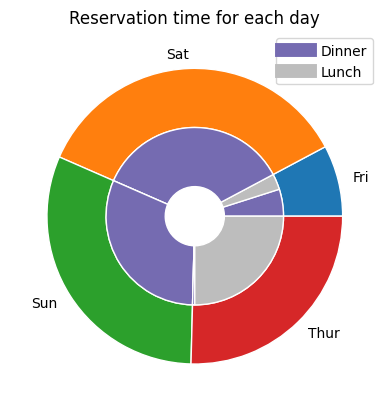

In [21]:
# we transform the data to give us a row count of day and time columns

# first we group the day and time columns
day_and_time_columns = data_frame.groupby(by=["day", "time"])

# then we count each occurence of a reservation on each day
day_and_time_counted = (
    day_and_time_columns.size().unstack(fill_value=0).stack()
)
# name the count column to count
day_and_time = day_and_time_counted.reset_index(name="count")

# we split up the count columns into equal chunks for each day
counts_as_numpy = day_and_time["count"].to_numpy()
vals = np.array(np.split(counts_as_numpy, int(len(counts_as_numpy)/unique_time.size)))

# now that we have performed the data transformations we can display the results
# as a pie chart
size = 0.4
fig, ax = plt.subplots()

cmap = plt.colormaps["tab20c"]
inner_colors = cmap([12, 18, 12, 4, 12, 4])

# we plot the total reservations for each day (like the previous plot)
ax.pie(
    vals.sum(axis=1),
    labels=day_and_time.day.unique(),
    radius=1,
    wedgeprops=dict(width=size, edgecolor="w"),
)

# we plot the type of reservation that were made for each day
ax.pie(
    vals.flatten(),
    radius=1 - size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor="w"),
)

# we create a legend for the different colors
custom_legends = [Line2D([0], [0], color=cmap(12), linewidth=10), Line2D([0], [0], color=cmap(18), linewidth=10),]
ax.legend(custom_legends, ["Dinner", "Lunch"])

ax.set(aspect="equal", title="Reservation time for each day")
plt.show()


As we can tell from the pie chart above, most reservations during the weekends were dinner reservations, while most reservations on thursday were lunch reservations. Given that the relative percent of reservations on a weekday and a weekend day were near equal, and the split reservations on a friday, we can conclude that most people order lunch on weekdays and dinner on weekends.

Next we will investigate if there is a correlation between the tipping amount and the total bill. In order to do so we will create a scatter plot over the given dataset.

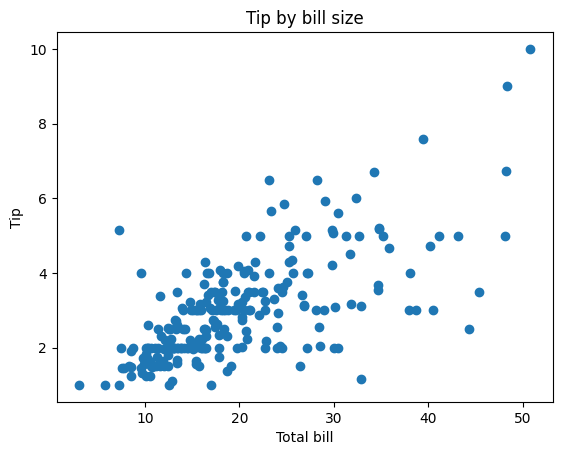

In [25]:
# first we get the total bill and tip data from the dataframe
total_bill, tip = data_frame.total_bill, data_frame.tip

# we plot the datapoints
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.title("Tip by bill size")
plt.scatter(total_bill, tip)

plt.show()

As you can see from the scatter plot, there seems to be a correlation between tip and total bill.
A linear increment of the tip over total bill would mean that people tip a constant percent of the total bill. That however, does not seem to be the case for the higher bills. To investigate this further, we will perform regression analysis.


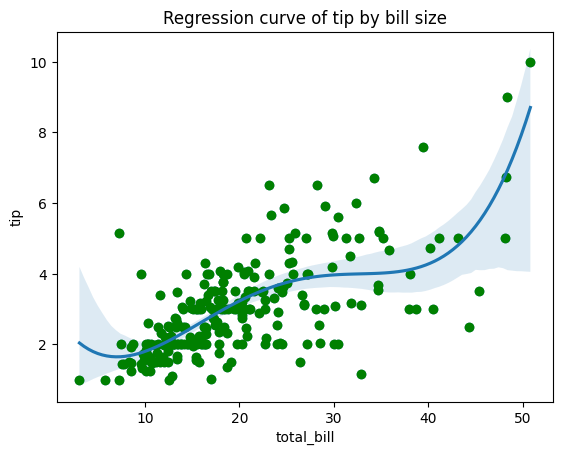

In [24]:
# use green as color for individual points
plt.plot(total_bill, tip, 'o', color='green')

# we use seaborn to plot a polynomial regression line
sns.regplot(x=total_bill, y=tip, order=4)
plt.title("Regression curve of tip by bill size")
plt.show()

As we can see from the regression curve above, the tips appear to stagnate somewhat as the total bill increases. It must be noted that the higher total bill data has a higher uncertainty, due to a lower sample size. The data with high certainty shows a more linear growth. This doesn't take away from the fact that around half of the tips on higher total bills did not match the same tip percent as the lower total bills. We can conclude that a customer usually tips more based on their bill, but more data is needed to conclude on the tip to bill relationship on larger bills.

To get more insight on the dataset we will look at some of the other columns like `smoker` and `size` 

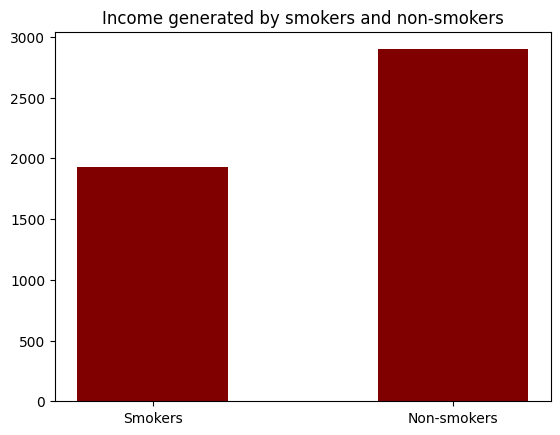

In [22]:
# we group the data frame based on whether smoker is true or false
smokers     = data_frame.loc[data_frame["smoker"] == "Yes"]
non_smokers = data_frame.loc[data_frame["smoker"] == "No"]

# next we display the income generated from smokers and non-smokers
plt.bar(["Smokers", "Non-smokers"],
        [smokers["total_bill"].sum(), non_smokers["total_bill"].sum()],
        color="maroon",
        width=0.5)
plt.title("Income generated by smokers and non-smokers")
plt.show()

As we can see, most income was generated from non smoking reservations. Smokers do however make up a considerable amount of the total income. Next we will look at the number of people per reservation.

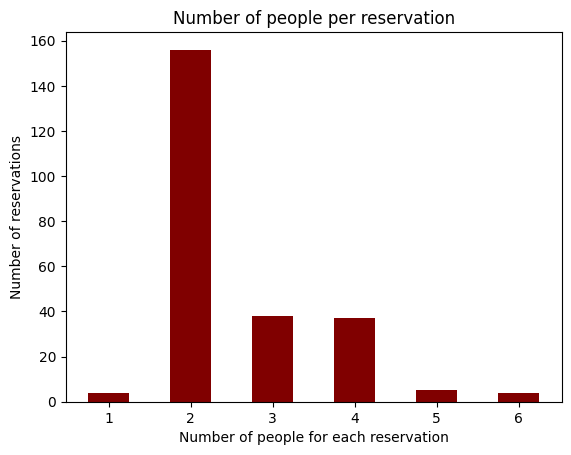

In [23]:
# we count each occurence of the size column
reservation_size, reservation_size_counts = np.unique(data_frame["size"], return_counts=True)

plt.bar(reservation_size,
        reservation_size_counts,
        color="maroon",
        width=0.5)

plt.xlabel("Number of people for each reservation")
plt.ylabel("Number of reservations")
plt.title("Number of people per reservation")
plt.show()

It appears that almost all reservations were made for two people. Another observation is that the restaurant must be able to accommodate up to six people. 

# Subtask D - Conclusion

From the data exploration in subtask b, we can indeed conclude that the data represents a log of restaurant orders. Some notable discoveries include: 

- Customers order dinners on weekends and lunch on weekdays and a mix of both on friday. This could mean that the restaurant should prioritize ingredient purchases for those meals respectively.

- Customers appear to tip a greater percent of the bill on smaller orders.

- A great deal of the total income is generated through customers who smoke. This means the restaurant must be able to accommodate for smoking individuals.

- Most reservations were made for two people. This could mean that the restaurant should have more tables pre-prepared for two people.